Topic:        Explore MTA turnstile data
Date:         01/15/2015
Name:         Kenneth Chadwick
Worked with:  Bryan, Ingrid, Ben, Jamie, Thomas, Jamie

In [2]:
!wc -l *

  100000 100k.txt
   10000 10k.txt
  115000 115k.txt
  125000 125k.txt
  150000 150k.txt
    1000 20150530.txt
wc: Archive: read: Is a directory
   74224 ProjectBenson (Functions)(Geo)(20160114)-Copy1.ipynb
  129947 ProjectBenson (Functions)(Geo)(20160114).ipynb
     302 ProjectBenson.ipynb
    3940 Remote-Booth-Station.xls
    1742 Summary (20150516-20150612).xlsx
    2688 Summary150523.txt
    2687 Summary150530.txt
    2683 Summary150606.txt
    2687 Summary150613.txt
    3365 Summaryturnstile_150404.txt
    3367 Summaryturnstile_150411.txt
    3365 Summaryturnstile_150418.txt
    3370 Summaryturnstile_150425.txt
    3367 Summaryturnstile_150502.txt
    3357 Summaryturnstile_150509.txt
    3371 Summaryturnstile_150523.txt
    3371 Summaryturnstile_150530.txt
    3369 Summaryturnstile_150606.txt
    3373 Summaryturnstile_150613.txt
    3373 Summaryturnstile_150620.txt
    3358 Summaryturnstile_160109.txt
     275 Summarywithgeoturnstile_150404.png
    5611 Summarywithgeoturnstile_150

In [1]:
!head -1687 turnstile_150523.txt > test0523.txt

head: turnstile_150523.txt: No such file or directory


In [3]:
import collections
import csv
#import seaborn

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from collections import defaultdict
from datetime import datetime


In [4]:
def readdata(filename):

    tempdict = defaultdict(list)
    
    with open(filename) as csvfile:
        temp = csv.reader(csvfile, delimiter=',')
        next(temp, None)
        
#        rows = [[item.rstrip() for item in row] for row in temp]
        
        for row in temp:
            row[10] = row[10].rstrip()
            tempdict[tuple(row[:4])].append(tuple(row[4:]))

    return tempdict

In [9]:
def tidy(temp):
    
    tempdict = defaultdict(list)

    for k, val in temp.items():
        for _, _, date, time, _, entrance, exit in val:
            dt = datetime.strptime(date + time,'%m/%d/%Y%X')
             
            tempdict[k, date] += (dt, int(entrance))

    return tempdict

In [5]:
def tally(temp):
    
    global filename

    tempdict = defaultdict(list)

    f = open('baddata_'+filename, 'w')
    f.write("BAD DATA!\n")
    f.write("Station/Turnstile, Last Turnstile Count of Day, First Turnstile Count of Day\n")

    for k, val in temp.items():
        temp = []
    
        if val[len(val)-1] >= val[1] and val[len(val)-1] - val[1] < 50000:
            tempdict[k] = val[len(val)-1] - val[1]
        else:
            tempdict[k] = -1
#            print 'BAD DATA!', val[len(val)-1], val[1]
            temp = k[0][3] + k[0][2] + "," + str(val[len(val)-1]) + "," + str(val[1]) + "\n"
            f.write(temp) 

    f.close()
    
    return tempdict

In [10]:
def daily(temp):
    
    tempdict = defaultdict(int)
    
    for k, val in temp.items():
        if val >= 0:
            tempdict[k[0][1],k[0][3],k[1]] += val
            
    return tempdict

In [11]:
def station(temp):
    
    stationtotal = defaultdict(int)
    
    for k, val in temp.items():
        for i in range(0,len(val)):
            stationtotal[k[3]] += val[i][1] 
        
    return stationtotal

In [50]:
def summaryreport(temp):
    
    global filename
    
    temp = 'Summary' + filename
    
    f = open(temp, 'w')
    
    for k,val in sorted(stationdaily.items()):
        print k, " : ", val
        temp = k[1] + " : " + k[2] + " : " + str(val) + "\n"
        
        f.write(temp)
        
    f.close()

In [7]:
def plots(temp):
    
    dates = []
    counts = [] 
    mtastations = []
    
    for k,val in sorted(temp.items()):
#        print type(k), len(k), k[0], '/', k[1], ' - ', k[2],' :', val
        dates.append(k[2])
        counts.append(val)
        mtastations.append(k[0])
        
    tempdata = zip(mtastations,dates,counts)
    
    df = pd.DataFrame(tempdata,columns=["Station","Date","Count"])
#    df.head()

    stations = df.groupby("Station")
    
    plt.figure(figsize=(10,3))

    for name, group in stations:
        g = group["Date"]
        c = group["Count"]
        ng = list(pd.Series([pd.to_datetime(date) for date in g]))

    ##  Plotting the data
#    plt.plot(ng,c,'ro', alpha = 0.5)
    plt.plot(ng,c, alpha = 0.5)
    plt.xlabel('Date')
    plt.ylabel('Daily Turnstile Counts')
    plt.title('New York City MTA Subway Turnstile Entry Counts')

    plt.show()

In [13]:
def hourly(temp):
    
    tempdict = defaultdict(list)
    
    for k, val in sorted(temp.items()):
        temp = val
#        print type(temp), temp
        dt = []
        count = []
        
        for i in range(0,len(val)-1,2):
            dt.append(val[i])
            count.append(val[i+1])
        
        for i in range(0,len(count)-1):
            if i == 0:
                tempdict[k] += (dt[i], 0)
                continue
        
            if count[i] >= count[i-1] and count[i] - count[i-1] < 50000:
                tempdict[k] += (dt[i], count[i+1] - count[i])
            else:
                tempdict[k] += (dt[i], -1)
        
    return tempdict

## Main

In [627]:
rawdata = defaultdict(list)
tidydata = defaultdict(list)
turnstiledaily = defaultdict(list)
stationdaily = defaultdict(list)
stationhourly = defaultdict(list)

##  Test Data files
#filename = 'test0523.txt'
#filename = 'turnstile_160109.txt'

##  Data files for evaluation

#filename = 'turnstile_150404.txt'
#filename = 'turnstile_150411.txt'
#filename = 'turnstile_150418.txt'
#filename = 'turnstile_150425.txt'
#filename = 'turnstile_150502.txt'
# filename = 'turnstile_150509.txt'
# filename = 'turnstile_150523.txt'
# filename = 'turnstile_150530.txt'
# filename = 'turnstile_150606.txt'
filename = 'turnstile_150613.txt'
#filename = 'turnstile_150620.txt'

rawdata = readdata(filename)
tidydata = tidy(rawdata)
stationhourly = hourly(tidydata)
turnstiledaily = tally(tidydata)
stationdaily = daily(turnstiledaily)

#summaryreport(stationdaily)
#plots(stationdaily)

In [628]:
temp = stationdaily
    
dates = []
counts = [] 

mtastations = []

for k,val in sorted(temp.items()):
#    print type(k), len(k), k[0], '/', k[1], ' - ', k[2],' :', val
    dates.append(k[2])
    counts.append(val)
    mtastations.append(k[0])

tempdata = zip(mtastations,dates,counts)

df = pd.DataFrame(tempdata,columns=["Station","Date","Count"])

#df.head()

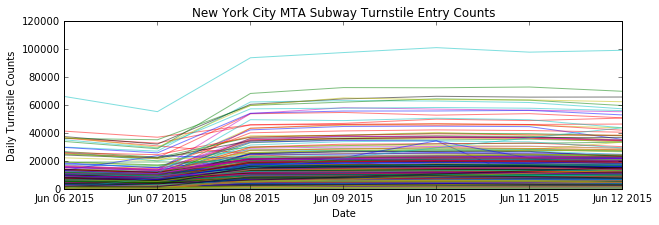

In [629]:
stations = df.groupby("Station")

plt.figure(figsize=(10,3))

for name, group in stations:
#    print name
#    print group
    g = group["Date"]
    c = group["Count"]
    ng = list(pd.Series([pd.to_datetime(date) for date in g]))
#    print type(g)
#    print list(ng)

    ##  Plotting the data
#    plt.plot(ng,c,'ro', alpha = 0.5)
    plt.plot(ng,c, alpha = 0.5)
    plt.xlabel('Date')
    plt.ylabel('Daily Turnstile Counts')
#    plt.title('New York City MTA Subway ' + name + ' Turnstile Entry Counts')
    plt.title('New York City MTA Subway Turnstile Entry Counts')

plt.show()



In [630]:

with open('geocoded.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

stations,lat,lon,CA,unit = [],[],[],[],[]
station_geo = dict()
for lines in rows:
    CA.append(lines[1])
    unit.append(lines[0])
    lat.append(lines[5])
    lon.append(lines[6])
    stations.append(lines[2])
    station_geo[lines[2]] = [lines[5],lines[6]]

In [631]:
geo_data = zip(stations,lat,lon,unit)
geo_pd = pd.DataFrame(geo_data, columns=['STATION', 'LAT', 'LON','UNIT'])

In [632]:
unittemp = []
statemp = []
datetemp = []
valtemp = []

attempt = map(lambda x: list(x), stationdaily.keys())
#print attempt
# stationdaily.values()

for k,val in sorted(stationdaily.items()):
#    print k[0], k[1], k[2], val
    unittemp.append(k[0])
    statemp.append(k[1])
    datetemp.append(k[2])
    valtemp.append(val)

In [633]:
tempzip = zip(unittemp,statemp,datetemp,valtemp)
final_mtadata_pd = pd.DataFrame(tempzip, columns=["UNIT","STATION","DATE","COUNT"])

In [634]:
#final_mtadata_pd.head()

In [635]:
def geo_data(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        rows = [[cell.strip() for cell in row] for row in reader]

    stations,lat,lon,CA,unit = [],[],[],[],[]
    station_geo = dict()
    for lines in rows:
        CA.append(lines[1])
        unit.append(lines[0])
        lat.append(lines[5])
        lon.append(lines[6])
        stations.append(lines[2])
        station_geo[lines[2]] = [lines[5],lines[6]]
    geo_data = zip(stations,lat,lon,unit)
    return geo_data

def geo_df(geo_data):
    geo_pd = pd.DataFrame(geo_data, columns=['STATION', 'LAT', 'LON','UNIT'])
    return geo_pd

def merge_data(geopd, mtapd):
    merged_geopd = pd.merge(geopd, mtapd, on="UNIT") # how = 'outer'
    return merged_geopd

In [636]:
res = geo_data('geocoded.csv')
geodf = geo_df(res)



In [637]:
mta_geo = merge_data(geodf,final_mtadata_pd)
#mta_geo.head()

In [638]:
mtageocsv = mta_geo.to_csv()
temp = 'Summarywithgeo' + filename
f = open(temp, 'w')
f.write(mtageocsv)
f.close()

In [639]:
#soilist = ['R014', 'R204', 'R041', 'R461']

soilist = ['R014']

temp = stationdaily
templist = soilist

soi = defaultdict(int)

tempval = 0
i = 0

for k,val in temp.items():
#    print type(k), len(k), k[0]
    if k[0] in soilist:
        soi[k] += val

if len(templist) == 1:
    for k,val in sorted(soi.items()):
#        print k, " : ", val
        tempval += val
        i += 1
        station = k[1]
        first = k[2]
    
#    print station + ' Daily Turnstile Entry Average is ' + str(tempval/i) + ' for the week starting ' + str(first)
#    print station + ' Weekly Total Turnstile Entrys is ' + str(tempval) + ' for the week starting ' + str(first)
    


In [640]:
# ziplist = []
# # try_df = pd.DataFrame()
# first = stationhourly.next()
print first
new_dict = dict()
for k,val in stationhourly.items():
    if len(val)== 10:
        new_dict[k]=val
for k,val in stationhourly.items():
    print k,val
    break

attempt = pd.DataFrame.from_dict(new_dict,orient='index').reset_index()
# orient=["TUPLE","DATE1","DATE2","DATE3","DATE4","DATE5","DATE6","DATE7","DATE8","DATE9","DATE10","DATE11","DATE12","DATE13","DATE14"])
#     try_df.from_records(all_values)
attempt.head(n=10)
index= attempt["index"]

06/12/2015
(('PTH10', 'R547', '00-00-03', '9TH STREET'), '06/12/2015') [datetime.datetime(2015, 6, 12, 2, 56, 11), 0, datetime.datetime(2015, 6, 12, 7, 8, 11), 46, datetime.datetime(2015, 6, 12, 11, 19, 43), 74, datetime.datetime(2015, 6, 12, 15, 32, 11), 346, datetime.datetime(2015, 6, 12, 19, 44, 11), 263]


In [641]:
unit = []
machine = []
address = []
date = []
for value in index:
    tupled = value[0]
    unit.append(tupled[1])
    machine.append(tupled[2])
    address.append(tupled[3])
    date.append(value[1])
attempt["unit"]=unit
attempt["machine"]=machine
attempt["address"]=address
attempt["date"]=date
attempt["unit-address"]=zip(unit,address)

In [642]:
tryme = attempt.groupby("unit-address").sum().reset_index()

In [643]:
attempt.head()

,index,0,1,2,3,4,5,6,7,8,9,unit,machine,address,date,unit-address
0,"((PTH10, R547, 00-00-03, 9TH STREET), 06/12/2015)",2015-06-12 02:56:11,0,2015-06-12 07:08:11,46,2015-06-12 11:19:43,74,2015-06-12 15:32:11,346,2015-06-12 19:44:11,263,R547,00-00-03,9TH STREET,06/12/2015,"(R547, 9TH STREET)"
1,"((N420B, R317, 00-03-01, CLINTON-WASH AV), 06/...",2015-06-07 01:00:00,0,2015-06-07 05:00:00,0,2015-06-07 09:00:00,16,2015-06-07 13:00:00,6,2015-06-07 17:00:00,8,R317,00-03-01,CLINTON-WASH AV,06/07/2015,"(R317, CLINTON-WASH AV)"
2,"((PTH08, R540, 00-00-01, PATH WTC), 06/12/2015)",2015-06-12 02:22:58,0,2015-06-12 06:34:58,246,2015-06-12 10:46:58,199,2015-06-12 14:58:58,1087,2015-06-12 19:10:58,226,R540,00-00-01,PATH WTC,06/12/2015,"(R540, PATH WTC)"
3,"((N009, R174, 01-00-00, 181 ST), 06/08/2015)",2015-06-08 01:00:00,0,2015-06-08 05:00:00,775,2015-06-08 09:00:00,568,2015-06-08 13:00:00,402,2015-06-08 17:00:00,319,R174,01-00-00,181 ST,06/08/2015,"(R174, 181 ST)"
4,"((R250, R179, 00-00-05, 86 ST), 06/06/2015)",2015-06-06 00:00:00,0,2015-06-06 04:00:00,18,2015-06-06 08:00:00,167,2015-06-06 12:00:00,412,2015-06-06 16:00:00,402,R179,00-00-05,86 ST,06/06/2015,"(R179, 86 ST)"


In [644]:
tryme.head()

,unit-address,1,3,5,7,9
0,"(R001, SOUTH FERRY)",0,20859,16885,24837,26007
1,"(R001, WHITEHALL ST)",0,12836,14213,26921,35102
2,"(R003, CYPRESS HILLS)",0,2999,2665,1825,1422
3,"(R004, ELDERTS LANE)",0,8250,6056,5129,3311
4,"(R005, FOREST PARKWAY)",0,9028,7544,4285,2981


In [645]:
a_unit, a_addres = [],[]
for val in tryme["unit-address"]:
    a_unit.append(val[0])
    a_addres.append(val[1])
new_pd = tryme
new_pd["ADDRESS"] = a_addres
new_pd["UNIT"] = a_unit

In [646]:
# new_pd = new_pd.drop('unit-address',1)
new_pd.head()

,unit-address,1,3,5,7,9,ADDRESS,UNIT
0,"(R001, SOUTH FERRY)",0,20859,16885,24837,26007,SOUTH FERRY,R001
1,"(R001, WHITEHALL ST)",0,12836,14213,26921,35102,WHITEHALL ST,R001
2,"(R003, CYPRESS HILLS)",0,2999,2665,1825,1422,CYPRESS HILLS,R003
3,"(R004, ELDERTS LANE)",0,8250,6056,5129,3311,ELDERTS LANE,R004
4,"(R005, FOREST PARKWAY)",0,9028,7544,4285,2981,FOREST PARKWAY,R005


In [647]:
new_pd.sort(5)

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,unit-address,1,3,5,7,9,ADDRESS,UNIT
476,"(R549, NEWARK HM HE)",0,28,0,3,27,NEWARK HM HE,R549
453,"(R459, ORCHARD BEACH)",0,0,0,17,58,ORCHARD BEACH,R459
411,"(R415, BROAD CHANNEL)",0,1103,234,388,201,BROAD CHANNEL,R415
414,"(R418, BEACH 105 ST)",0,844,288,626,346,BEACH 105 ST,R418
464,"(R540, PATH WTC 2)",0,231,482,1114,994,PATH WTC 2,R540
413,"(R417, BEACH 98 ST)",0,1360,586,1601,896,BEACH 98 ST,R417
415,"(R419, ROCKAWAY PK 116)",0,1625,779,1720,1409,ROCKAWAY PK 116,R419
451,"(R455, 25 ST)",0,564,804,872,1499,25 ST,R455
458,"(R464, AQUEDUCT TRACK)",0,1183,832,2839,4787,AQUEDUCT TRACK,R464
160,"(R165, TOMPKINSVILLE)",0,1138,908,1574,903,TOMPKINSVILLE,R165


In [648]:
long_range = pd.merge(tryme,attempt,on="unit-address").drop_duplicates(subset='unit-address').drop('5_y',1).drop('7_y',1).drop('3_y',1).drop('9_y',1).drop('1_y',1)

In [649]:
new_long_range = long_range.drop('1_x',1).drop(0,1).drop('address',1).drop('unit',1).drop('machine',1).drop('unit-address',1).drop('index',1)

In [650]:
new_long_range.head()
merged_datetimesums = pd.merge(new_long_range,geo_pd,right_on="STATION",left_on="ADDRESS").drop('STATION',1).drop('UNIT_y',1)
# first_hour = new_long_range.loc[:, ['3_x', 2, 'ADDRESS']]
# second_hour
# third_hour
# fourth_hour = new_long_range

In [651]:
merged_datetimesums.head()

,3_x,5_x,7_x,9_x,ADDRESS,UNIT_x,2,4,6,8,date,LAT,LON
0,20859,16885,24837,26007,SOUTH FERRY,R001,2015-06-10 05:00:00,2015-06-10 09:00:00,2015-06-10 13:00:00,2015-06-10 17:00:00,06/10/2015,40.703082,-74.012983
1,12836,14213,26921,35102,WHITEHALL ST,R001,2015-06-07 05:00:00,2015-06-07 09:00:00,2015-06-07 13:00:00,2015-06-07 17:00:00,06/07/2015,40.703082,-74.012983
2,12836,14213,26921,35102,WHITEHALL ST,R001,2015-06-07 05:00:00,2015-06-07 09:00:00,2015-06-07 13:00:00,2015-06-07 17:00:00,06/07/2015,40.703082,-74.012983
3,2999,2665,1825,1422,CYPRESS HILLS,R003,2015-06-12 04:00:00,2015-06-12 08:00:00,2015-06-12 12:00:00,2015-06-12 16:00:00,06/12/2015,40.689945,-73.872564
4,8250,6056,5129,3311,ELDERTS LANE,R004,2015-06-06 04:00:00,2015-06-06 08:00:00,2015-06-06 12:00:00,2015-06-06 16:00:00,06/06/2015,40.69132,-73.867135


In [652]:
first_hour = merged_datetimesums.loc[:, ['3_x', 2, 'ADDRESS','date','LAT','LON']]
second_hour =  merged_datetimesums.loc[:, ['5_x', 4, 'ADDRESS','date','LAT','LON']]
third_hour =  merged_datetimesums.loc[:, ['7_x', 6, 'ADDRESS','date','LAT','LON']]
fourth_hour =  merged_datetimesums.loc[:, ['9_x', 8, 'ADDRESS','date','LAT','LON']]

In [653]:
first_hour = first_hour.rename(columns={'3_x': 'DATETIME', 2: 'COUNT', 'date':'DATE','LAT':'LAT','LON':'LON'})
second_hour = second_hour.rename(columns={'5_x': 'DATETIME', 4: 'COUNT', 'date':'DATE','LAT':'LAT','LON':'LON'})
third_hour = third_hour.rename(columns={'7_x': 'DATETIME', 6: 'COUNT', 'date':'DATE','LAT':'LAT','LON':'LON'})
fourth_hour = fourth_hour.rename(columns={'9_x': 'DATETIME', 8: 'COUNT', 'date':'DATE','LAT':'LAT','LON':'LON'})

In [654]:
second_hour.head()

,DATETIME,COUNT,ADDRESS,DATE,LAT,LON
0,16885,2015-06-10 09:00:00,SOUTH FERRY,06/10/2015,40.703082,-74.012983
1,14213,2015-06-07 09:00:00,WHITEHALL ST,06/07/2015,40.703082,-74.012983
2,14213,2015-06-07 09:00:00,WHITEHALL ST,06/07/2015,40.703082,-74.012983
3,2665,2015-06-12 08:00:00,CYPRESS HILLS,06/12/2015,40.689945,-73.872564
4,6056,2015-06-06 08:00:00,ELDERTS LANE,06/06/2015,40.69132,-73.867135


In [655]:
all_times_pd = first_hour.append(second_hour).append(third_hour).append(fourth_hour)

In [656]:
filez = all_times_pd.to_csv()
f = open('all_times_geo_F.csv','a')
f.write(filez)
f.close()

In [180]:
attempt = zip(*ziplist)
# print attempt[5]
df = pd.DataFrame()

In [42]:
len(attempt)

7

In [95]:
ziplist = []
a = []
b = []
c = []
d = []
e = []
f = []
g = []
h = []
i = []
j = []
k = []
l = []
m = []
n = []

for k,val in stationhourly.items():
#    print type(val[6]), val[6]
    a.append(k[0][1])
    b.append(k[0][2])
    c.append(k[0][3])
    d.append(k[1])
    e.append(val[0])
    f.append(val[1])
    g.append(val[2])
    h.append(val[3])
    i.append(val[4])
    j.append(val[5])
#    k.append(val[6])
#    l.append(val[7])
#    m.append(val[8])
#    n.append(val[9])
    
print j
    
#     #     print k, ' : ', val 
#     keys = list(k[0])+[k[1]]
#     values = val
#     all_values = keys+values
#     print all_values
# #     ziplist.append(all_values)
# #     print all_values
#     break
# # print len(ziplist)
# # stationhourly

IndexError: list index out of range

In [32]:
r1 = [1,'cat',2.3,]
r2 = [2,'dog',4.4]
r3 = [3,'mouse',5.5]
sets = [r1,r2,r3]

In [31]:
zip(r1,r2,r3)

[(1, 2, 3), ('cat', 'dog', 'mouse'), (2.3, 4.4, 5.5)]

In [36]:
zz = zip(*sets)

In [35]:
df = pd.DataFrame()

In [37]:
df["T"]=zz[0]

In [38]:
df

,T
0,1
1,2
2,3


In [70]:
from copy import deepcopy
v2 = deepcopy(v1)
v3 = deepcopy(v1)

In [71]:
v2[0]='second'
v3[0]='third'

In [74]:
seter = [v1,v2,v3]

In [75]:
zzz = zip(*seter)

In [77]:
len(zzz)

15

In [82]:
print len(zzz),zzz

15 [('E001', 'second', 'third'), ('R368', 'R368', 'R368'), ('00-00-00', '00-00-00', '00-00-00'), ('9 AVE', '9 AVE', '9 AVE'), ('05/06/2015', '05/06/2015', '05/06/2015'), (datetime.datetime(2015, 5, 6, 1, 0), datetime.datetime(2015, 5, 6, 1, 0), datetime.datetime(2015, 5, 6, 1, 0)), (0, 0, 0), (datetime.datetime(2015, 5, 6, 5, 0), datetime.datetime(2015, 5, 6, 5, 0), datetime.datetime(2015, 5, 6, 5, 0)), (247, 247, 247), (datetime.datetime(2015, 5, 6, 9, 0), datetime.datetime(2015, 5, 6, 9, 0), datetime.datetime(2015, 5, 6, 9, 0)), (114, 114, 114), (datetime.datetime(2015, 5, 6, 13, 0), datetime.datetime(2015, 5, 6, 13, 0), datetime.datetime(2015, 5, 6, 13, 0)), (67, 67, 67), (datetime.datetime(2015, 5, 6, 17, 0), datetime.datetime(2015, 5, 6, 17, 0), datetime.datetime(2015, 5, 6, 17, 0)), (78, 78, 78)]


In [200]:
geo_pd.head()

,STATION,LAT,LON,UNIT
0,ELTINGVILLE PK,40.5446,-74.164581,R470
1,HARRISON,40.738879,-74.155533,R544
2,TOMPKINSVILLE,40.636948,-74.074824,R165
3,ST. GEORGE,40.643738,-74.073622,R070
4,ST. GEORGE,40.643738,-74.073622,R070
